## Problem Statement: 

Normally, most of the bank's wealth is obtained from providing credit loans so that a marketing bank must be able to reduce the risk of non-performing credit loans. The risk of providing loans can be minimized by studying patterns from existing lending data. One technique that you can use to solve this problem is to use data mining techniques. Data mining makes it possible to find hidden information from large data sets by way of classification.


### The goal of this project, you have to build a model to predict whether the person, described by the attributes of the dataset, is a good (1) or a bad (0) credit risk

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings

In [2]:
## load the data as pandas dataframe

df = pd.read_csv("dataset.csv")

In [3]:
## Show top 5 records

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [4]:
## Show bottom 5 records
df.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
## Shape of the data

df.shape
print('The Number of rows of the dataframe is:', df.shape[0], '.')
print('The Number of rows of the dataframe is:', df.shape[1], '.')

The Number of rows of the dataframe is: 1000 .
The Number of rows of the dataframe is: 21 .


### Data Dictionary:

- `Status`: Status of the debtor's checking account with the bank (categorical)
- `duration`: credit duration in months (quantitative)
- `credit_history` : history of compliance with previous or concurrent credit contracts (categorical)
- `purpose`: purpose for which the credit is needed (categorical)
- `amount`: credit amount in DM 
- `savings` : debtor's savings (categorical)
- `employment_duration`:duration of debtor's employment with current employer (ordinal; discretized quantitative)
- `installment_rate` : credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)
- `personal_status_sex`: combined information on sex and marital status
- `other_debtors`: Is there another debtor or a guarantor for the credit? (categorical)
- `present_residence`: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)
- `property`: the debtor's most valuable property
- `age`: age in years (quantitative)
- `other_installment_plans`: installment plans from providers other than the credit-giving bank (categorical)
- `housing`: type of housing the debtor lives in (categorical)
- `number_credits`: number of credits including the current one the debtor has (or had) at this bank 
- `job` : quality of debtor's job (ordinal)
- `people_liable`: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) 
- `telephone`: Is there a telephone landline registered on the debtor's name? 
- `foreign_worker`: Is the debtor a foreign worker? (binary)
- `credit_risk`: Has the credit contract been complied with (good) or not (bad) 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [7]:
df.dtypes.value_counts()

object    18
int64      3
dtype: int64

In [8]:
round(df.describe(include='all').T,2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,1000,4,... >= 200 DM / salary for at least 1 year,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_history,1000,5,no credits taken/all credits paid back duly,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,10,furniture/equipment,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1000.0,NaN,NaN,NaN,3271.248,2822.75176,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000,5,unknown/no savings account,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,1000,5,1 <= ... < 4 yrs,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_rate,1000,4,< 20,476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_status_sex,1000,4,male : married/widowed,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_debtors,1000,3,none,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for column in df.columns:
    if df[column].dtype:
        print(column.upper(),':',df[column].nunique())
        print(df[column].unique())
        print('\n')

STATUS : 4
['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']


DURATION : 33
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]


CREDIT_HISTORY : 5
['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']


PURPOSE : 10
['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']


AMOUNT : 923
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160 

In [10]:
df.nunique().sum()

1079

### Insights:

- Dataset has 1000 rows and 21 columns from which data has 18 object data types and 3 numerical type data.
- Noticeably, there are unique values present in the dataset.
- Noticeably, there are 5 types of credit history present in the dataset, where majority of the customers have either not taken any credits or have paid back credits duly on time.
- Maximum times credit has been used wither for funiture or equipment.
- On an average credit amount taken is 2319.5 with a  maximum amount of 18424 and minimum of 250.0.
- Noticeably, most of the customers who have taken credit either donot have a savings account or there account status is unknown and there employemnet duration is also ranging from less than 1 year to less than or equal to 4 years.
- Most of the customer who have take credit are either males who are married or are males of widowed status.
- Age of customers taking credit is ranging from 19 to 75 years. Noticeably, 75% of the times customer of age 42 years have taken a credit.
- Noticeably, quality of debtor's job taking credit is either skilled employee or an official.
- Noticeably, number of persons who are financially dependent on the debtor is 0 to 2.
- Maximum times the credit contract been complied as `good`.
- Noticeably, customers who are taking credits are not foreign workers.
- `Data does not seem to have anomalies or bad values present in it.`
- column 'telephone' seems irrelevant , we can drop the column.

In [11]:
df = df.drop(columns=['telephone'], axis=1)

df.head(2)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,good


In [12]:
df.shape

(1000, 20)

### Checking for Missing Values

In [13]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
foreign_worker             0
credit_risk                0
dtype: int64

***Noticeably data doesnot have missing values in it.*** 

### Checking Duplicated Values:

In [14]:
dups=df.duplicated()
print('Number of duplicated rows = %d' % (dups.sum()))
df[dups]

Number of duplicated rows = 0


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,foreign_worker,credit_risk


***Noticeably, there are no duplicated records present in the dataset.***

## Exploratory Data Analysis:

### Univariate Analysis:

In [15]:
def univariateAnalysis_numeric(column,nbins):
    print ("Description of" + column)
    print("-----------------------------------------------------------")
    print(df[column].describe(),end='')
    
    plt.figure()
    print ("Distribution of" + column)
    print("-----------------------------------------------------------")
    sns.distplot(df[column],kde=True,color='b')
    
    plt.figure()
    print ("Boxplot of" + column)
    print("-----------------------------------------------------------")
    ax=sns.boxplot(x=df[column],color='y')
    plt.show()

In [16]:
df_num=df.select_dtypes(include=['int64'])
df_cat=df.select_dtypes(include=['object'])

Categorical_column_list=list(df_cat.columns.values)
Numerical_column_list=list(df_num.columns.values)

Categorical_length=len(Categorical_column_list)
Numerical_length=len(Numerical_column_list)

print("Length of Categorical columns is :", Categorical_length)
print("Length of Numerical columns is :", Numerical_length)

Length of Categorical columns is : 17
Length of Numerical columns is : 3


In [17]:
df_cat.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,foreign_worker,credit_risk
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official,0 to 2,no,good
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,3-Feb,skilled employee/official,3 or more,no,good
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,0 to 2,no,good
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,3-Feb,unskilled - resident,3 or more,yes,good
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,3-Feb,unskilled - resident,0 to 2,yes,good


In [18]:
df_num.head()

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


Description ofduration
-----------------------------------------------------------
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64Distribution ofduration
-----------------------------------------------------------
Boxplot ofduration
-----------------------------------------------------------


/var/folders/cv/6vz6rhvs07z23qt7cw8js2200000gp/T/ipykernel_1903/3642123688.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],kde=True,color='b')


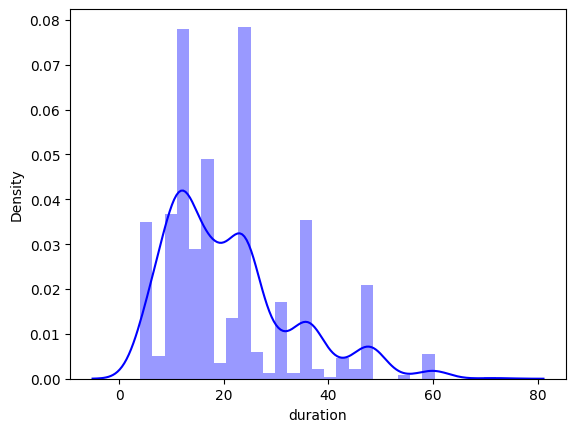

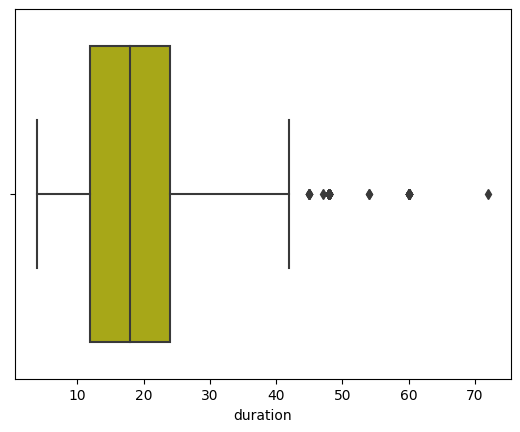

Description ofamount
-----------------------------------------------------------
count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: amount, dtype: float64Distribution ofamount
-----------------------------------------------------------
Boxplot ofamount
-----------------------------------------------------------


/var/folders/cv/6vz6rhvs07z23qt7cw8js2200000gp/T/ipykernel_1903/3642123688.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],kde=True,color='b')


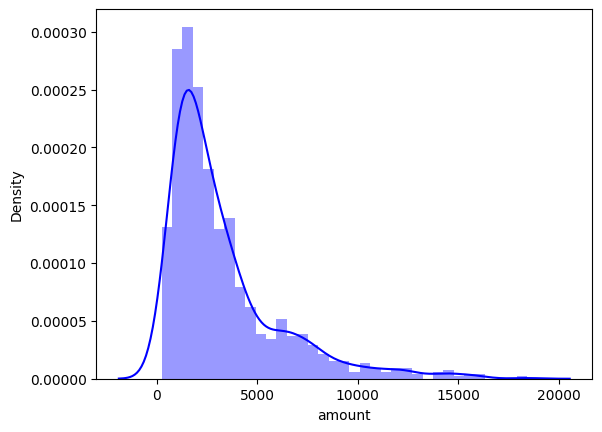

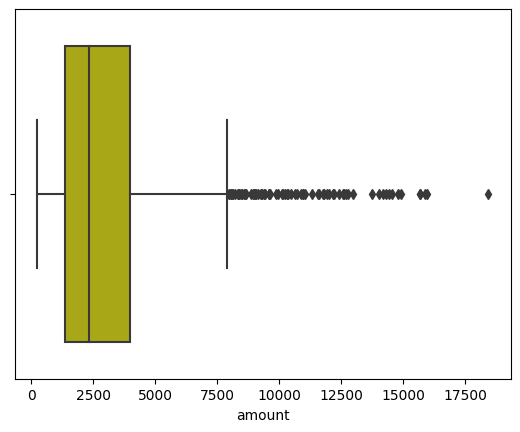

Description ofage
-----------------------------------------------------------
count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: age, dtype: float64Distribution ofage
-----------------------------------------------------------


/var/folders/cv/6vz6rhvs07z23qt7cw8js2200000gp/T/ipykernel_1903/3642123688.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],kde=True,color='b')


Boxplot ofage
-----------------------------------------------------------


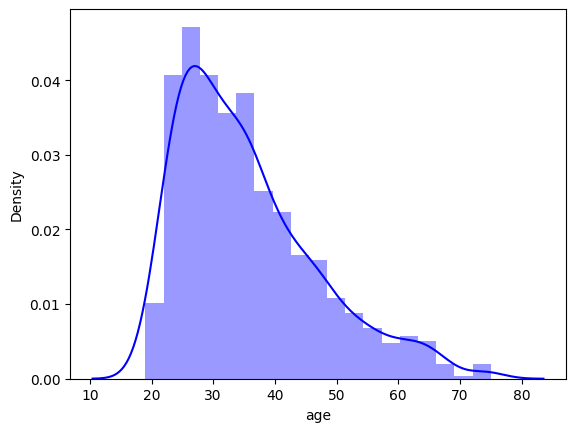

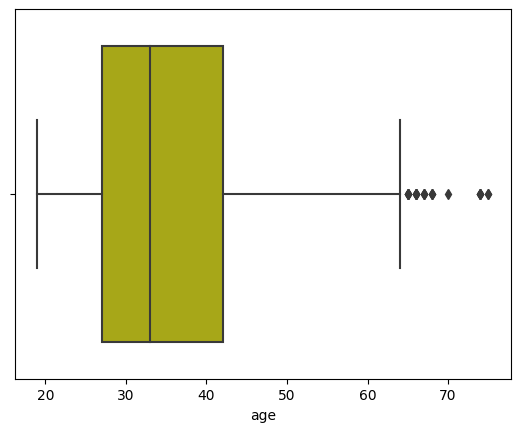

In [19]:
for x in Numerical_column_list:
    univariateAnalysis_numeric(x,20)

### Insights:

- Noticeably, there are 18 Categorical columns and 3 Numerical columns present in the dataset.
- Minimum credit duration is 4 months and maximum credit duration is 72 months. On an average credit has been taken for approximately 21 months.
- `Noticeably, there are outliers present in the dataset.`
- On an average credit amount taken is 2319.5 DM with a maximum amount of 18424 DM and minimum of 250.0 DM.
- Age of customers taking credit is ranging from 19 to 75 years. Noticeably, 75% of the times customer of age 42 years have taken a credit.

### Distribution Plot:


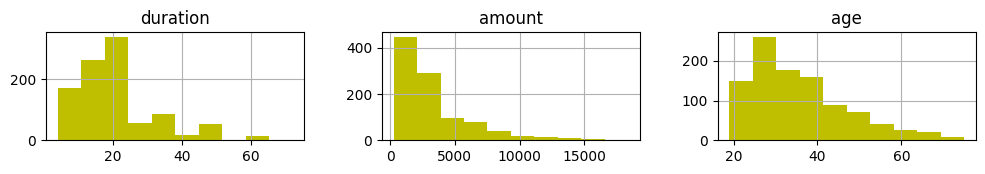

In [20]:
df.hist(figsize=(12,16), layout=(9,3), color = 'y');

plt.title(" Distribution Plot for Continuous Variables")
plt.ylabel("Density")
plt.show()

### Outlier Check:

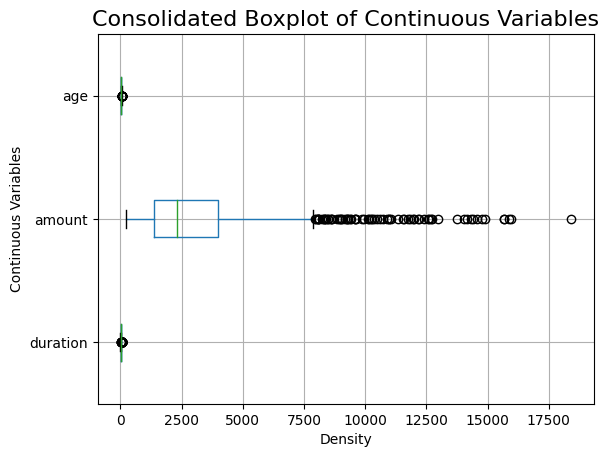

In [21]:
# construct box plot for continuous variables
df.boxplot(vert=0)
plt.ylabel('Continuous Variables')
plt.xlabel('Density')
plt.title('Consolidated Boxplot of Continuous Variables',fontsize=16)
plt.show()


##### Noticeably there are outliers present in the dataset.

#### Outlier Treatment:

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in df_num.columns:
    lr,ur=remove_outlier(df_num[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])


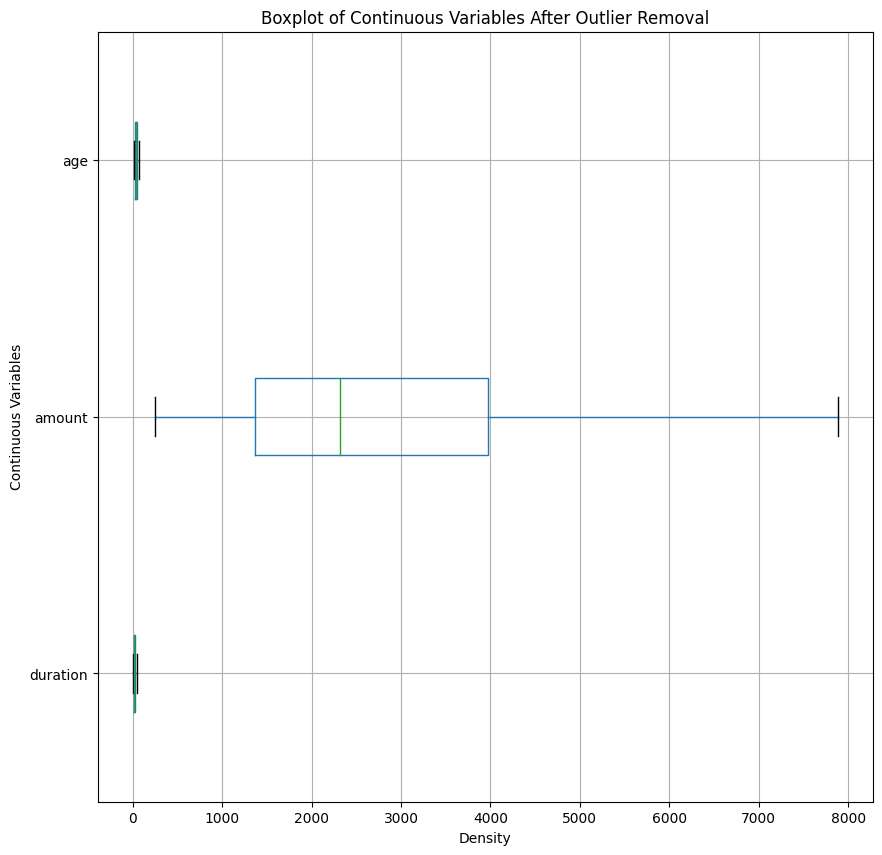

In [24]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.ylabel('Continuous Variables')
plt.xlabel('Density')
plt.title('Boxplot of Continuous Variables After Outlier Removal')
plt.show()

##### Noticeably, outliers have been treated now.

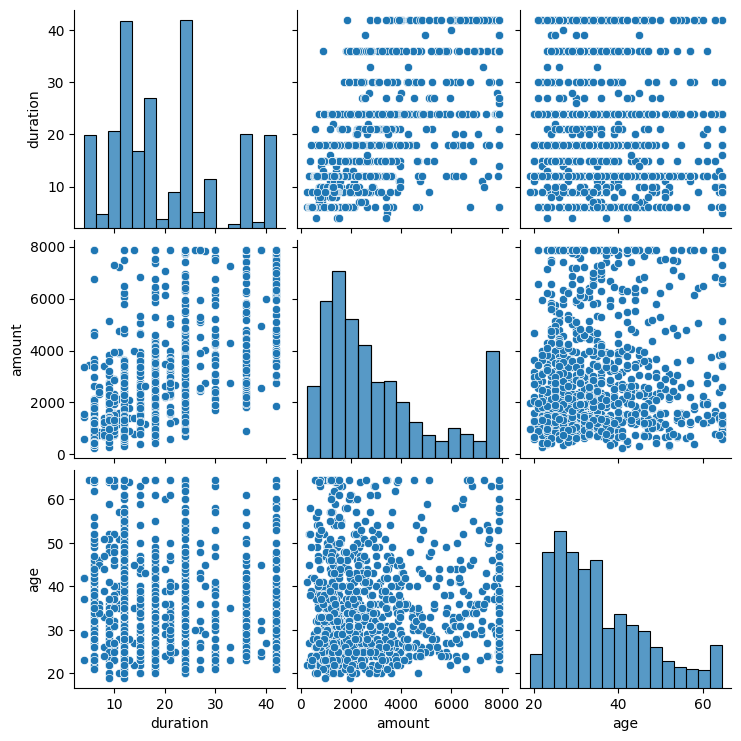

In [25]:
sns.pairplot(df)

### Check multicollinearity in the dataset

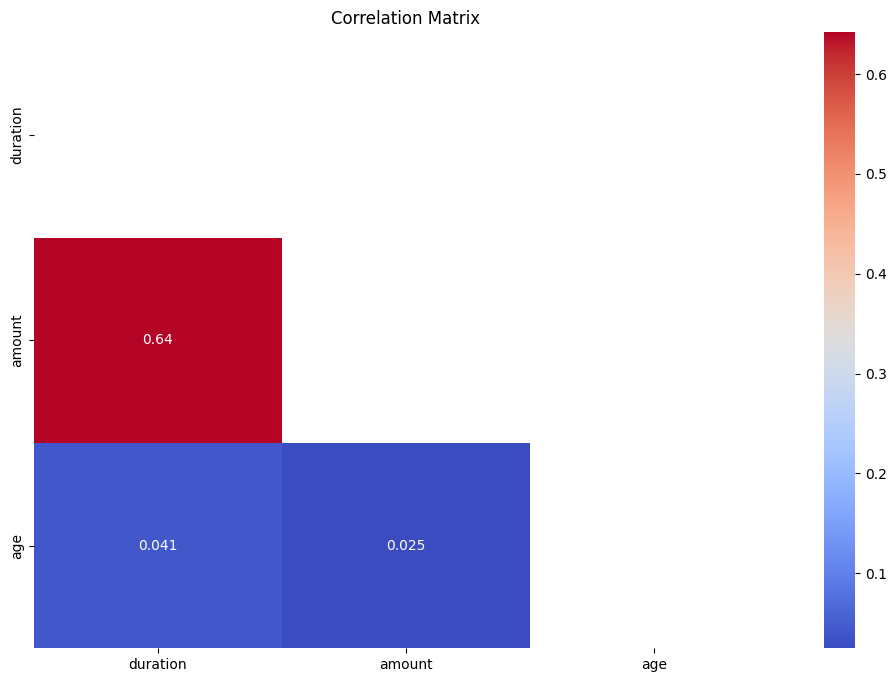

Multicollinear columns: set()


In [26]:
def check_multicollinearity(df, threshold=0.8):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=np.triu(df_numeric.corr().abs()))
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

multicollinear_cols = check_multicollinearity(df)
print("Multicollinear columns:", multicollinear_cols)

#### Noticeably, data does not have multicollinearity present in it.

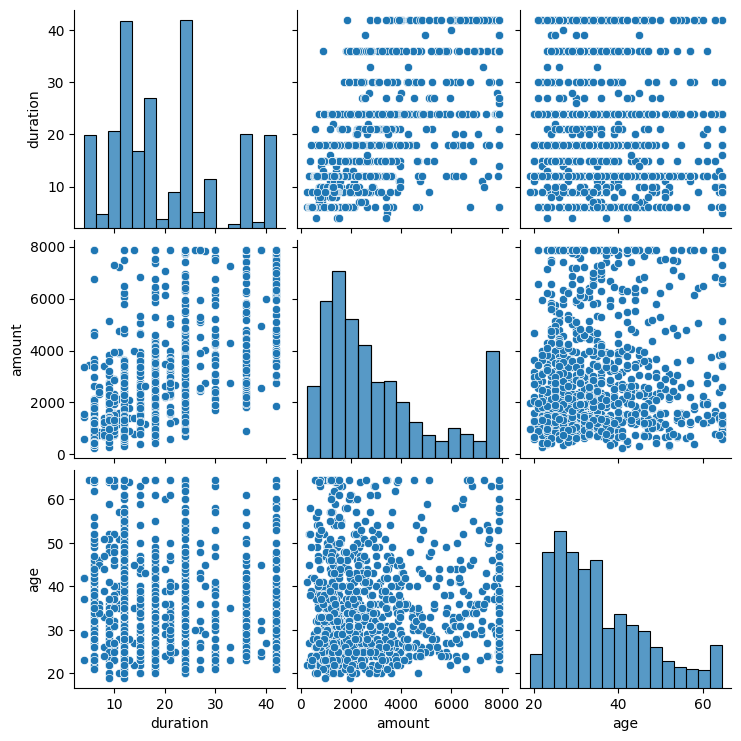

In [27]:
sns.pairplot(df)

In [28]:
df_num.columns

Index(['duration', 'amount', 'age'], dtype='object')

### Manually encoding the Target variable:

In [29]:
df.credit_risk.replace(to_replace=0, value='bad', inplace=True)
df.credit_risk.replace(to_replace=1, value='good', inplace=True)
   

<Axes: xlabel='credit_risk', ylabel='age'>

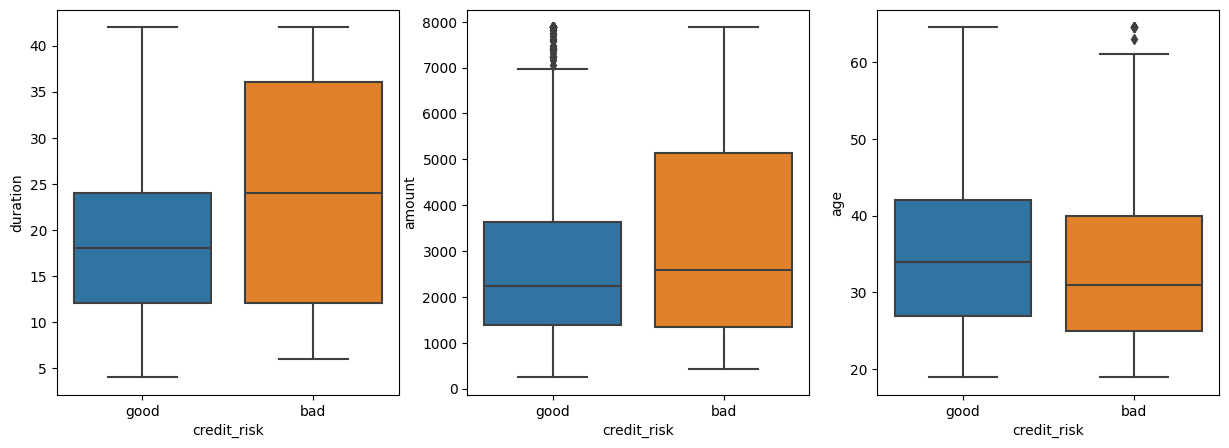

In [30]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.boxplot(x='credit_risk', y='duration', data=df, ax=axs[0])
sns.boxplot(x='credit_risk', y='amount', data=df, ax=axs[1])
sns.boxplot(x='credit_risk', y='age', data=df, ax=axs[2])

<Axes: xlabel='credit_risk', ylabel='count'>

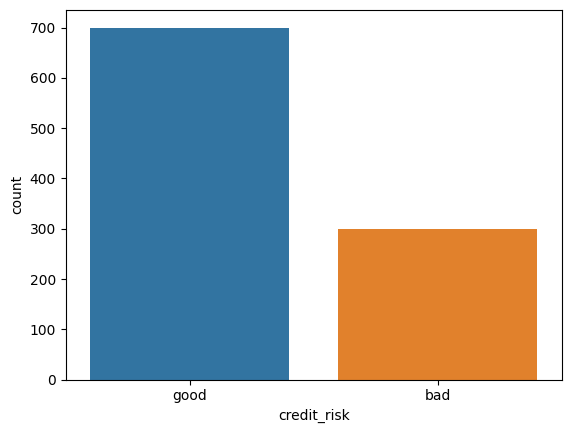

In [31]:
sns.countplot(x="credit_risk", data=df)

In [32]:
df.credit_risk.value_counts(normalize=True)

good    0.7
bad     0.3
Name: credit_risk, dtype: float64

### Insights:

- `Noticeably there is data imbalance. We will use SMOTE to treat this data imbalance as we proceed. Before we do that we will divide the dataset into train and test dataset.`

- Noticeably, customers with bad credit risk hve not paid credit for apporximately 36 months.
- Amount for which credit_risk has been defaulted is approximately 52000 DM.



In [33]:

for column in df_cat.columns:
    if df_cat[column].dtype:
        print(column.upper(),':',df_cat[column].nunique())
        print(df_cat[column].unique())
        print('\n')

STATUS : 4
['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']


CREDIT_HISTORY : 5
['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']


PURPOSE : 10
['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']


SAVINGS : 5
['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']


EMPLOYMENT_DURATION : 5
['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']


INSTALLMENT_RATE : 4
['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']


PERSONAL_STATUS_SEX : 4
['female : non-single or male : single' 'male : married/widowed'
 'female : single' 'male : divorced/separated']


OTHER_DEBTORS : 3
['none' 'guarantor' 'co-applicant']

### Insights

- columns 'amount','duration', 'age' seems irrelevant , we can drop these column.

In [34]:
df = df.drop(columns=['amount','duration', 'age'], axis=1)

df.head(2)

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,foreign_worker,credit_risk
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official,0 to 2,no,good
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,3-Feb,skilled employee/official,3 or more,no,good


In [35]:
df.shape

(1000, 17)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   credit_history           1000 non-null   object
 2   purpose                  1000 non-null   object
 3   savings                  1000 non-null   object
 4   employment_duration      1000 non-null   object
 5   installment_rate         1000 non-null   object
 6   personal_status_sex      1000 non-null   object
 7   other_debtors            1000 non-null   object
 8   present_residence        1000 non-null   object
 9   property                 1000 non-null   object
 10  other_installment_plans  1000 non-null   object
 11  housing                  1000 non-null   object
 12  number_credits           1000 non-null   object
 13  job                      1000 non-null   object
 14  people_liable            1000 non-null   

#### Noticeably the columns have been dropped and our dataset now only has catgorical variables which we can convert to numerical. Here, we will use LabelEncoder to convert the variables.

In [37]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='error')

for x in df.columns:
    df[x] = encoder.fit_transform(df[[x]])

#### Noticeably data encoding has been done.

Further we will do the Feature selection using f_classif and SelectKBest and Divide the dataset into Independent and Dependent features.

- `SelectKBest` is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. 

`NOTE: The scikit-learn machine library provides an implementation of the ANOVA f-test in the f_classif() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.`

In [38]:
df_cat.columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'foreign_worker',
       'credit_risk'],
      dtype='object')

In [39]:
feature_x = df[['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'foreign_worker']]
feature_y = df[["credit_risk"]]

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def best_features(X_train,y_train,X_test):
    fs = SelectKBest(score_func = f_classif, k="all")
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs,X_test_fs,fs

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature_x,feature_y,test_size=0.33,random_state=21)
X_train_fs,X_test_fs,fs = best_features(X_train,np.ravel(y_train),X_test)

### Checking Feature Scores:

Feature 0: 15.114744
Feature 1: 2.830369
Feature 2: 8.661804
Feature 3: 13.797063
Feature 4: 0.068904
Feature 5: 0.012320
Feature 6: 0.823288
Feature 7: 0.035779
Feature 8: 0.289097
Feature 9: 2.762386
Feature 10: 2.001100
Feature 11: 8.538512
Feature 12: 0.300599
Feature 13: 3.981330
Feature 14: 0.160326
Feature 15: 2.837622


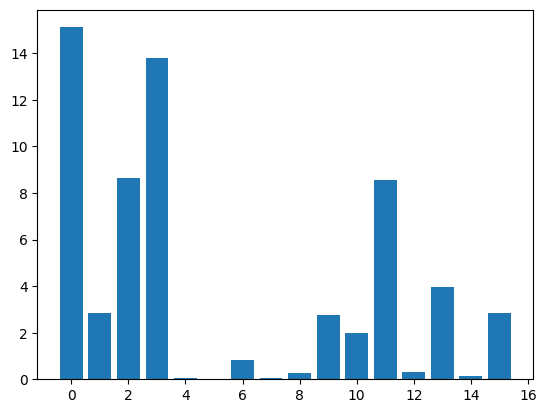

In [42]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores

plt.bar([i for i in range(len(fs.scores_))], fs.scores_ )
plt.show()

### Insights:

- Here, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

- Perhaps features 0, 2, 3, and 11 are most relevant.

- Bar chart of the feature importance scores for each input feature clearly shows that feature 0 might be the most relevant (according to test) and that perhaps ten of the sixteen input features are the more relevant.

We could set k=10 when configuring the SelectKBest to select these top four features.



### Divide the dataset into Independent and Dependent features

In [43]:
feature_x.columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'foreign_worker'],
      dtype='object')

In [44]:
X= df[['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'property',
       'other_installment_plans', 'housing', 'job', 'foreign_worker']]

y = df["credit_risk"]

In [45]:

X.head()

,status,credit_history,purpose,savings,personal_status_sex,property,other_installment_plans,housing,job,foreign_worker
0,3.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0
1,3.0,0.0,5.0,4.0,3.0,3.0,1.0,0.0,1.0,0.0
2,0.0,4.0,8.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0
3,3.0,0.0,5.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0
4,3.0,0.0,5.0,4.0,3.0,1.0,0.0,2.0,3.0,1.0


In [46]:

y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: credit_risk, dtype: float64

In [47]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [48]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (670, 10)
Number of rows and columns of the training set for the dependent variable: (670,)
Number of rows and columns of the test set for the independent variables: (330, 10)
Number of rows and columns of the test set for the dependent variable: (330,)


### Model Building: 

In [49]:
### Importing Libraries for Model Building

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
     

from sklearn.metrics import (accuracy_score,
                             f1_score, precision_score, recall_score,
                             roc_auc_score)


from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Import the ConfusionMatrixDisplay function
from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "Support Vector Machine Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}
     

In [51]:

def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [52]:

def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame which contains a report of all models metrics with cost
    '''
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list = []
    accuracy_list = []
    f1_score_list = []
    precision_list = []
    recall_list = []
    rocauc_score_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(model_name)
        models_list.append(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

        print('=' * 35)
        print('\n')

        accuracy_list.append(model_test_accuracy)
        f1_score_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        rocauc_score_list.append(model_test_rocauc_score)

    report = pd.DataFrame({
        'Model Name': models_list,
        'Accuracy': accuracy_list,
        'F1 Score': f1_score_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'ROC AUC Score': rocauc_score_list
    }).sort_values(by='F1 Score', ascending=False)

    return report

In [53]:

report = evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9776
- F1 score: 0.9845
- Precision: 0.9819
- Recall: 0.9870
- ROC AUC Score: 0.9703
----------------------------------
Model performance for Test set
- Accuracy: 0.6791
- F1 score: 0.7701
- Precision: 0.7347
- Recall: 0.8090
- ROC AUC Score: 0.6156


Decision Tree
Model performance for Training set
- Accuracy: 0.9776
- F1 score: 0.9844
- Precision: 0.9869
- Recall: 0.9818
- ROC AUC Score: 0.9744
----------------------------------
Model performance for Test set
- Accuracy: 0.6269
- F1 score: 0.7093
- Precision: 0.7349
- Recall: 0.6854
- ROC AUC Score: 0.5983


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8694
- F1 score: 0.9123
- Precision: 0.8814
- Recall: 0.9455
- ROC AUC Score: 0.8105
----------------------------------
Model performance for Test set
- Accuracy: 0.7015
- F1 score: 0.7872
- Precision: 0.7475
- Recall: 0.8315
- ROC AUC Score: 0.6380


Logistic Regression
Model performance for Training 

In [54]:

report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
3,Logistic Regression,0.679104,0.800000,0.682540,0.966292,0.538702
7,AdaBoost Classifier,0.701493,0.795918,0.728972,0.876404,0.615980
6,Support Vector Machine Classifier,0.664179,0.794521,0.669231,0.977528,0.510986
2,Gradient Boosting,0.701493,0.787234,0.747475,0.831461,0.637953
0,Random Forest,0.679104,0.770053,0.734694,0.808989,0.615605
4,K-Neighbors Classifier,0.649254,0.768473,0.684211,0.876404,0.538202
5,XGBClassifier,0.649254,0.737430,0.733333,0.741573,0.604120
1,Decision Tree,0.626866,0.709302,0.734940,0.685393,0.598252


### Hyper parameter tuning using Optuna

In [55]:

from sklearn.model_selection import KFold

In [56]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

def xgb_objective(trial):
    # Use the trial object to suggest values for the XGBClassifier hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)

    # Define the model with the suggested hyperparameters
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
    )

    # Calculate the score with 10-fold cross-validation, which returns a list of scores
    # Scoring is set to "accuracy" for classification tasks
    scores = cross_val_score(
        xgb,
        X_train,
        y_train,
        cv=KFold(n_splits=10, shuffle=True, random_state=42),
        scoring="f1",
        error_score="raise"
    )

    # Return the mean of 10 scores
    return scores.mean()
     

In [57]:

# Create Study object
study = optuna.create_study(direction="maximize")

# Optimize the study, use more trials to obtain a better result, use fewer trials to be more cost-efficient
study.optimize(xgb_objective, n_trials=10)  # Use more trials for better results

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")
     

[I 2023-08-07 20:33:31,174] A new study created in memory with name: no-name-d1a7dbce-afe2-4ddd-b685-8fb53d0fdea3
/var/folders/cv/6vz6rhvs07z23qt7cw8js2200000gp/T/ipykernel_1903/1313565546.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
[I 2023-08-07 20:33:32,762] Trial 0 finished with value: 0.8115469335291214 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.09363891253351411, 'min_child_weight': 5, 'subsample': 0.5935756294538097, 'colsample_bytree': 0.5965672741032039}. Best is trial 0 with value: 0.8115469335291214.
/var/folders/cv/6vz6rhvs07z23qt7cw8js2200000gp/T/ipykernel_1903/1313565546.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

Best score: 0.8330524265267523

Optimized parameters: {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.012259906597617241, 'min_child_weight': 6, 'subsample': 0.6481199986808979, 'colsample_bytree': 0.6797023083441207}



In [58]:

xgb = XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    min_child_weight = 2,
    learning_rate = 0.01719809821183534,
    subsample =0.9875543819267635,
    colsample_bytree = 0.9878435186457258

)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9878435186457258, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01719809821183534,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:

## Predictions

y_preds = xgb.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Assuming you have true labels y_test and predicted labels y_preds
print("Accuracy: ", accuracy_score(y_test, y_preds))
print("Precision: ", precision_score(y_test, y_preds))
print("Recall: ", recall_score(y_test, y_preds))
print("F1 Score: ", f1_score(y_test, y_preds))
print("AUC-ROC: ", roc_auc_score(y_test, y_preds))
print("AUC-PR: ", average_precision_score(y_test, y_preds))

Accuracy:  0.706060606060606
Precision:  0.7171717171717171
Recall:  0.9424778761061947
F1 Score:  0.8145315487571702
AUC-ROC:  0.5673927842069435
AUC-PR:  0.715312416197372


In [61]:

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier Accuracy Score (Test) :", accuracy_score(y_preds,y_test))

print("--------------------------------------------------------------------------------------")

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier Precision Score (Test) :", precision_score(y_preds,y_test))

print("----------------------------------------------------------------------------------------")

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier F1 Score (Test) :", f1_score(y_preds,y_test, average="weighted"))

Final XGB Classifier Accuracy Score (Train) : 0.7671641791044777
Final XGB Classifier Accuracy Score (Test) : 0.706060606060606
--------------------------------------------------------------------------------------
Final XGB Classifier Accuracy Score (Train) : 0.7671641791044777
Final XGB Classifier Precision Score (Test) : 0.9424778761061947
----------------------------------------------------------------------------------------
Final XGB Classifier Accuracy Score (Train) : 0.7671641791044777
Final XGB Classifier F1 Score (Test) : 0.7622754741734239


#### As mentioned earlier, as the given dataset is imbalanced, our prediction model may not perform well. In order to solve this, we will oversample our data with SMOTE method.

In [62]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [63]:
X_smote,y_smote = sm.fit_resample(X_train,y_train)

In [64]:
X_train.shape

(670, 10)

In [65]:
X_train_res.shape

(948, 10)

xgb_SMOTE = XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    min_child_weight = 2,
    learning_rate = 0.01719809821183534,
    subsample =0.9875543819267635,
    colsample_bytree = 0.9878435186457258

)

xgb_SMOTE.fit(X_train_res, y_train_res)

In [66]:

## Predictions

y_preds_smote = xgb_SMOTE.predict(X_test)

NameError: name 'xgb_SMOTE' is not defined

In [ ]:
# Assuming you have true labels y_test and predicted labels y_preds
print("Accuracy: ", accuracy_score(y_test, y_preds))
print("Precision: ", precision_score(y_test, y_preds))
print("Recall: ", recall_score(y_test, y_preds))
print("F1 Score: ", f1_score(y_test, y_preds))
print("AUC-ROC: ", roc_auc_score(y_test, y_preds))
print("AUC-PR: ", average_precision_score(y_test, y_preds))

In [ ]:
## Performance Matrix on train data set
y_train_predict = xgb_SMOTE.predict(X_train_res)
model_score = xgb_SMOTE.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

#### Noticeably, the model performed well after applying SMOTE. 

In [ ]:

#plots Confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_preds))
disp.plot(cmap="Blues")